In [ ]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data

Note that data from *All of Us* is being imported into *Final_Birth_Concept_Set_for_Import* and cleaned there,
so the import takes some time (about 2 mins)

In [ ]:
# As needed (i.e. once)
!pip install import-ipynb

importing Jupyter notebook from Final_Birth_Concept_Set_for_Import.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id      standard_concept_name  condition_start_datetime
0         1702510  Gestation period, 9 weeks 2020-06-03 06:00:00+00:00
1         1912251  Gestation period, 9 weeks 2021-05-14 06:00:00+00:00
2         1837105  Gestation period, 9 weeks 2022-03-15 00:00:00+00:00
3         5475312  Gestation period, 9 weeks 2019-09-13 00:00:00+00:00
4         2691089  Gestation period, 9 weeks 2020-06-04 06:00:00+00:00
...           ...                        ...                       ...
390800    3162619  Third trimester pregnancy 2016-04-15 14:26:00+00:00
390801    3382477  Third trimester pregnancy 2022-06-06 12:43:00+00:00
390802    2251361  Third trimester pregnancy 2019-06-07 10:26:00+00:00
390803    1777594  Third trimester pregnancy 2019-10-10 14:43:00+00:00
390804    1979701  Third trimester pregnancy 2019-09-10 08:48:00+00:00

[390805 rows x 3 columns]>


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id      standard_concept_name  condition_start_datetime  \
0         1702510  Gestation period, 9 weeks 2020-06-03 06:00:00+00:00   
1         1912251  Gestation period, 9 weeks 2021-05-14 06:00:00+00:00   
2         1837105  Gestation period, 9 weeks 2022-03-15 00:00:00+00:00   
3         5475312  Gestation period, 9 weeks 2019-09-13 00:00:00+00:00   
4         2691089  Gestation period, 9 weeks 2020-06-04 06:00:00+00:00   
...           ...                        ...                       ...   
173722    1639604          Single live birth 2010-11-16 05:00:00+00:00   
173723    1971142          Single live birth 2008-01-22 05:00:00+00:00   
173724    1158661          Single live birth 2015-03-10 20:22:00+00:00   
173725    1461185          Single live birth 2013-12-20 16:44:00+00:00   
173726    8575543          Single live birth 2014-09-10 05:00:00+00:00   

       condition_start_date  
0                2020-06-03  
1                20

Final_Birth_Concept_Set_for_Import.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

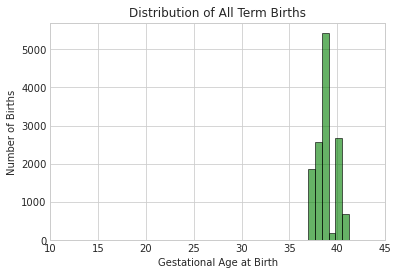

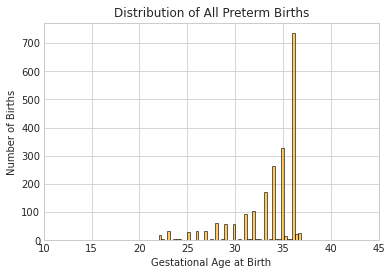

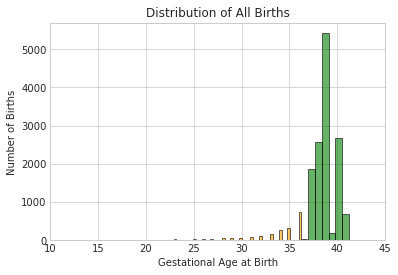

In [1]:
import import_ipynb
from Final_Birth_Concept_Set_for_Import import *

## Importing the *Person* data

In [2]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_30352193_person_df = pandas.read_gbq(
    dataset_30352193_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_person_df.head(5)

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

## Importing the *Zip Code* data

In [3]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_30352193_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_30352193_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

# Combining each data frame into a single data frame

## Importing needed packages

In [4]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [5]:
# condition_df

condition_df = final_birth_data



# person_df

person_df_drop_columns = ['gender_concept_id', 'race_concept_id', 'ethnicity_concept_id', 'sex_at_birth_concept_id']

person_df = dataset_30352193_person_df.drop(columns=person_df_drop_columns)


# zip_df

# note this wikipedia list of zip_code prefixes (i.e. first 3 digits):
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes

zip_df = dataset_30352193_zip_code_socioeconomic_df

## Finding common values of *person_id* and restricting data frames to rows with common values

In [6]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_person = list(person_df.person_id.unique())
unique_ids_zip = list(zip_df.person_id.unique())

In [7]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids_condition:
    if (pid in unique_ids_person) and (pid in unique_ids_zip):
        common_ids.append(pid)

common_ids.sort()

In [8]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_person = person_df[person_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_zip = zip_df[zip_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

## Merging restricted_person and restricted_zip

In [9]:
## restricted_condition, restricted_person, and restricted_zip all have the same values of person_id occuring in them
## each value of person_id occurs only once in restricted_person and restricted_zip
## we start by simply merging restricted_person and restricted_zip along person_id

combined_df = pd.merge(restricted_person, restricted_zip, on='person_id')

## next, we rename the columns to identify which data frame they originally came from

person_zip_col_dict = {}

for col in restricted_person.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_person"

for col in restricted_zip.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_zip"

combined_df = combined_df.rename(columns=person_zip_col_dict)

## Adding the *condition* data

### We start by splitting up *restricted_condition* by *birth_order*

In [10]:
## Note that as of 11 Nov 2023, we see
## Everyone has a first birth
## 3127 out of 11952 have a second birth
## 467 out of 11952 have a third birth
## For run time concerns, we only include first and second births

first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
#third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])
#fourth_birth = restricted_condition[restricted_condition['birth_order'] == 4].copy().sort_values(by=["person_id"])
#fifth_birth = restricted_condition[restricted_condition['birth_order'] == 5].copy().sort_values(by=["person_id"])

### Next, we fill out *second_birth* so there is a row for every value of *person_id*

In [11]:
## We now reset the indexing on second_birth to easily add our extra rows

second_birth.reset_index(drop=True, inplace=True)

last_index = second_birth.index.max()

true_second_birthers = second_birth.person_id.tolist()

for pid in common_ids:
    if pid not in true_second_birthers:
        last_index += 1
        second_birth.loc[last_index] = [pid, None, None, None, 2]

second_birth = second_birth.sort_values(by=["person_id"])

### We update the column names in *first_birth* and *second_birth* before merging and drop *birth_order*

In [12]:
first_birth_dict = {}

for col in first_birth.columns:
    if col != 'person_id':
        first_birth_dict[col] = "first_"+col
        
second_birth_dict = {}

for col in second_birth.columns:
    if col != 'person_id':
        second_birth_dict[col] = "second_"+col

first_birth = first_birth.rename(columns=first_birth_dict)
second_birth = second_birth.rename(columns=second_birth_dict)

first_birth = first_birth.drop(columns=['first_birth_order'])
second_birth = second_birth.drop(columns=['second_birth_order'])

### Finally, we merge *first_birth* and *second_birth* with *combined_df* along *person_id*

In [13]:
combined_df = pd.merge(combined_df, first_birth, on='person_id')

combined_df = pd.merge(combined_df, second_birth, on='person_id')

In [14]:
pd.options.display.max_columns = None
combined_df.head()

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,first_condition_start_date,first_birth_class,first_gestational_age_at_birth,second_condition_start_date,second_birth_class,second_gestational_age_at_birth
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2017,2021-09-22,Term,39.0,NaT,NaN,NaN
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2017,2021-08-10,Term,40.0,NaT,NaN,NaN
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,42632.000716,6.287592,18.639903,15.527784,0.360499,2017,2019-08-06,Term,40.0,NaT,NaN,NaN
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.587510,66.084673,69333.203649,16.807387,16.542301,2.669649,0.397667,2017,2018-11-09,Term,40.0,NaT,NaN,NaN
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017,2017-06-28,Term,39.0,2019-06-29,Preterm,29.0


# Data Exploration and Visualizations

## Importing packages for data exploration and visualizations

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Value counts and plots

In [ ]:
# Show all data in a pairplot
sns.pairplot(combined_df)
plt.show()

In [ ]:
# Value count for ethnicity

combined_df.value_counts("ethnicity_df3")

In [ ]:
# Value count for race
combined_df.value_counts("race_df3")

In [ ]:
# Income
plt.figure(figsize=(6,4))
combined_df.median_income_df4.hist()
plt.xlabel('Median Income ($)')
plt.ylabel('Count')

In [ ]:
# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Race")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Ethnicity")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Education
plt.figure(figsize=(6,4))
combined_df.high_school_education_df4.hist()
plt.xlabel('% of people in zipcode who completed high school')
plt.ylabel('Count')

In [ ]:
# Swarm plot for race & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Race")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Swarm plot for ethnicity & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Ethnicity")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scatter plot for education & income
sns.scatterplot(data = combined_df,
                vars=[]
                
                x = combined_df.high_school_education_df4,
                y = combined_df.median_income_df4)
sns.pairplot(dataset_copy, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue = "Outcome", markers=["o", "s"])

plt.xlabel("% of people in zipcode who completed high school")
plt.ylabel("Median income in that zipcode")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Bar plot for race

combined_df.race_df3.value_counts().plot(kind = 'barh')


In [ ]:
# Bar plot for ethnicity

combined_df.ethnicity_df3.value_counts().plot(kind = 'barh')
